In [35]:
import datetime

import pandas as pd
import numpy as np
import sklearn 
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [48]:
#read in
feature_names = ['Health_Status', 'Unhealthy_Days', 'Birth_Defects','Obesity','High_Blood_Pres','Smoker','Diabetes']    

demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
leading = pd.read_csv("./data/LEADINGCAUSESOFDEATH.csv", usecols=['A_Wh_BirthDef','A_Bl_BirthDef', 'A_Ot_BirthDef', 'A_Hi_BirthDef'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Carbon_Monoxide_Ind','Ozone_Ind', 'Particulate_Matter_Ind','Lead_Ind'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])
summary.info()


leading['Birth_Defects'] = leading['A_Wh_BirthDef'] + leading['A_Bl_BirthDef'] + leading['A_Ot_BirthDef'] + leading['A_Hi_BirthDef'] + measure['Infant_Mortality']
leading.drop(['A_Wh_BirthDef','A_Bl_BirthDef', 'A_Ot_BirthDef', 'A_Hi_BirthDef'] , axis = 1, inplace= True)
measure.drop(['Infant_Mortality'] , axis = 1, inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 2 columns):
Health_Status     3141 non-null float64
Unhealthy_Days    3141 non-null float64
dtypes: float64(2)
memory usage: 49.2 KB


In [49]:
#merge
full = pd.concat([demographics, summary,leading, measure, vunerable,risk], axis=1, join="inner")

In [50]:
full.info()
full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 16 columns):
State_FIPS_Code           3141 non-null int64
Health_Status             3141 non-null float64
Unhealthy_Days            3141 non-null float64
Birth_Defects             3141 non-null float64
Premature                 3141 non-null float64
Under_18                  3141 non-null float64
Over_40                   3141 non-null float64
Toxic_Chem                3141 non-null int64
Carbon_Monoxide_Ind       3141 non-null int64
Ozone_Ind                 3141 non-null int64
Particulate_Matter_Ind    3141 non-null int64
Lead_Ind                  3141 non-null int64
Obesity                   3141 non-null float64
High_Blood_Pres           3141 non-null float64
Smoker                    3141 non-null float64
Diabetes                  3141 non-null float64
dtypes: float64(10), int64(6)
memory usage: 392.7 KB


,State_FIPS_Code,Health_Status,Unhealthy_Days,Birth_Defects,Premature,Under_18,Over_40,Toxic_Chem,Carbon_Monoxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,Obesity,High_Blood_Pres,Smoker,Diabetes
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,30.304680,-221.227889,-187.741897,-4043.633684,5.445782,-23.668609,-44.669214,1.411760e+06,1.000318,1.066221,1.005412,1.000318,-307.284241,-559.874849,-292.487902,-142.517765
std,15.134423,460.837341,423.142860,940.675869,89.329406,178.062926,224.274166,1.022878e+07,0.017843,0.248708,0.073381,0.017843,516.246132,568.622294,508.390227,381.651636
min,1.000000,-1111.100000,-1111.100000,-11110.200000,-2222.200000,-2222.200000,-2222.200000,-2.222000e+03,1.000000,1.000000,1.000000,1.000000,-1111.100000,-1111.100000,-1111.100000,-1111.100000
25%,18.000000,8.900000,4.500000,-4438.700000,10.200000,2.900000,1.100000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,-1111.100000,-1111.100000,-1111.100000,5.000000
50%,29.000000,14.600000,5.700000,-4435.700000,11.700000,4.300000,1.500000,4.783100e+04,1.000000,1.000000,1.000000,1.000000,21.700000,-1111.100000,20.300000,7.000000
75%,45.000000,19.400000,6.600000,-3305.800000,13.200000,6.000000,2.100000,5.662850e+05,1.000000,1.000000,1.000000,1.000000,25.800000,26.100000,25.100000,9.100000
max,56.000000,47.700000,12.600000,113.900000,23.500000,14.500000,9.100000,4.987494e+08,2.000000,2.000000,2.000000,2.000000,42.600000,47.100000,46.200000,20.800000


In [51]:
data = full
array = full.values
X = array[:,1:]
y = array[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
tree_clf =  sklearn.linear_model.LinearRegression()
tree_clf.fit(X,y)
y_pred = tree_clf.predict(X_test)

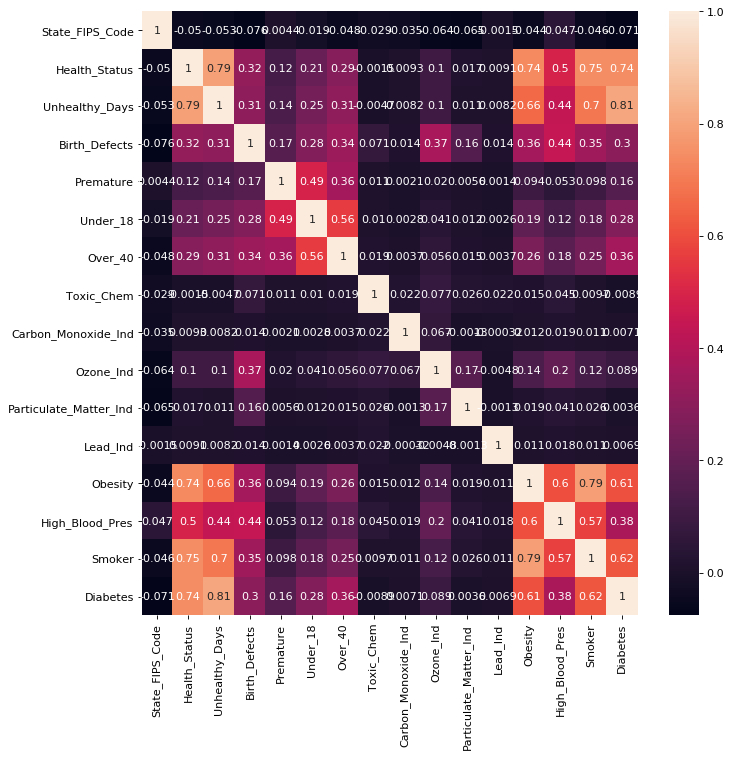

In [53]:
corr = data.corr()
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data.corr(), annot = True)

In [57]:
def _main():

	test_size = 0.20
	seed = 7

	# test options and perform evaluation metric
	seed = 7
	scoring = 'accuracy'
	models = []
	models.append(('DecisionTree', DecisionTreeClassifier()))


	dtc = tree.DecisionTreeClassifier()
	_train(dtc, "Decision Tree Classifier", X_train, y_train, X_test, y_test)
    
	with open('DecisionTreeClassifier.dot', 'w') as file:
		tree.export_graphviz(dtc, out_file = file)
	file.close()
    
	(graph,) = pydot.graph_from_dot_file('DecisionTreeClassifier.dot')
	graph.write_png('DecisionTreeClassifier.png')    
    
    
	models.clear()
	models.append(('DecisionTree', dtc))
	_predictionAccuracySummary(models, X_train, y_train, X_test, y_test)
    
    
def _train(alg,algName, X_train, y_train, X_test, Y_test):
	print(datetime.datetime.now(), "Begin training: ", algName)
	alg.fit(X_train, y_train)
	print(datetime.datetime.now(), "End training: ", algName)    

def _predictionAccuracySummary(models, X_train, y_train, X_test, y_test):
	print("Algorithm\t\tAccuracy Score")
	for name, model in models:
		predictions = model.predict(X_test)
		print("%20s\t\t%0.2f" % (name, accuracy_score(y_test, predictions)))
	
_main()

2019-04-03 19:19:16.616301 Begin training:  Decision Tree Classifier
2019-04-03 19:19:16.648700 End training:  Decision Tree Classifier
Algorithm		Accuracy Score


NameError: name 'accuracy_score' is not defined